In [13]:
%matplotlib inline

from matplotlib import pyplot as plt
from collections import defaultdict
import json
import numpy as np
import pandas as pd
import re
import sys
import seaborn as sb
from analyze_experiment_in_progress import get_data_from_logs
sb.set()

In [14]:
#bert4rec outperforms everything
#experiment_logs = './results/bert4rec_config_2021_11_04T17_15_31/stdout'

#SALREC-BCE-Great
#experiment_logs = './results/bert4rec_config_2021_11_07T22_26_10/stdout'


#SALREC-Lambdarank 0.157107
#experiment_logs = './results/ml_benchmark20m_2021_11_18T16_38_37/stdout'



#Transformer-Lambdarank 0.1603
#experiment_logs = './results/ml_benchmark20m_2021_11_19T17_43_30/stdout'

#experiment_logs = './results/ml_benchmark20m_2021_11_23T14_39_04/stdout'

#experiment_logs = './results/ml_benchmark20m_2021_11_25T09_41_35/stdout'

#Fast Lambdarank on dekstop
#experiment_logs = './results/ml_benchmark20m_2021_11_27T23_55_22/stdout'


#Fast Lambdarank on dekstop - 40k, bce slightly better
#experiment_logs = './results/ml_benchmark20m_2021_11_28T08_36_11/stdout'


# Learning rate effects:

# Lambdarank
#experiment_logs = "./results/ml_benchmark20m_2021_11_26T10_36_55/stdout"
#BCE
#experiment_logs = "./results/ml_benchmark20m_2021_11_27T11_36_03/stdout"



#Truncation effects: 
#1-20
#experiment_logs = "./results/ml_benchmark20m_2021_11_28T18_14_50/stdout"

#30-120
#experiment_logs = "./results/ml_benchmark20m_2021_11_29T15_12_00/stdout"


#stream -first run: 
#experiment_logs = "./results/steam_benchmark_2021_12_02T16_41_29/stdout"

#steam - num targets
#experiment_logs = "./results/steam_benchmark_2021_12_04T12_47_09/stdout"


#lambda norm effect:
#experiment_logs = "results/ml_benchmark20m_2021_12_02T10_46_35/stdout"

#truncated lambdarank with bce
experiment_logs = "./results/ml_benchmark20m_2021_12_05T21_30_29/stdout"



In [15]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [16]:
data = get_data_from_logs(experiment_logs, 0)

In [17]:
df = pd.DataFrame(data).set_index('model_name')

df.sort_values(df.columns[0])

,ndcg@10,ndcg@2,ndcg@5,ndcg@20,ndcg@40,precision@10,recall@10,SPS@1,SPS@10,MRR,MAP@10,apr@10,pairwise_cos_sim@10,model_build_time,model_inference_time,model_metadata,num_epochs,metrics_history
model_name,,,,,,,,,,,,,,,,,,
Transformer-Lambdarank-blocks:3-lr:0.001-ndcg:50-session_len:100-lambda_norm:True-truncate:5000-bce_weight:1.0,0.082113,0.044919,0.064905,0.100256,0.120117,0.015275,0.15275,0.03025,0.15275,0.073349,0.060780,759.577950,0.097749,3629.045774,164.623222,"{'epochs_trained': 59, 'best_val_ndcg': 0.08244457840919495, 'val_ndcg_history': [[53.99227452278137, 0.02381414920091629], [116.11940360069275, 0.02200145088136196], [177.6488184928894, 0.024649282917380333], [239.51647973060608, 0.026448223739862442]...",59,"[{'loss': 12.2935, 'ndcg_at_40': 0.055, 'val_loss': 11.2261, 'val_ndcg_at_40': 0.0238, 'epoch': 1, 'val_ndcg': 0.02381414920091629, 'best_ndcg': 0.02381414920091629, 'steps_since_improved': 0.0, 'total_training_time': 53.99227452278137}, {'loss': 11.90..."
Transformer-Lambdarank-blocks:3-lr:0.001-ndcg:50-session_len:100-lambda_norm:True-truncate:25000-bce_weight:0.1,0.090109,0.051196,0.071811,0.109195,0.129367,0.016300,0.16300,0.03700,0.16300,0.081029,0.068096,851.312250,0.090701,3622.953026,166.894194,"{'epochs_trained': 33, 'best_val_ndcg': 0.11321642994880676, 'val_ndcg_history': [[101.25424885749817, 0.022704575210809708], [212.29155111312866, 0.027064554393291473], [322.38647055625916, 0.023413244634866714], [432.1108238697052, 0.0308086369186639...",33,"[{'loss': 11.5787, 'ndcg_at_40': 0.0583, 'val_loss': 11.2241, 'val_ndcg_at_40': 0.0227, 'epoch': 1, 'val_ndcg': 0.022704575210809708, 'best_ndcg': 0.022704575210809708, 'steps_since_improved': 0.0, 'total_training_time': 101.25424885749817}, {'loss': 1..."
Transformer-Lambdarank-blocks:3-lr:0.001-ndcg:50-session_len:100-lambda_norm:True-truncate:25000-bce_weight:0.5,0.090150,0.048604,0.071271,0.110584,0.130978,0.016625,0.16625,0.03425,0.16625,0.080414,0.067086,737.326000,0.102288,3611.288967,165.982754,"{'epochs_trained': 33, 'best_val_ndcg': 0.09737251698970795, 'val_ndcg_history': [[101.37568473815918, 0.030367042869329453], [212.6719572544098, 0.02601420134305954], [322.62387466430664, 0.011839566752314568], [431.44074726104736, 0.0245541799813509]...",33,"[{'loss': 12.3573, 'ndcg_at_40': 0.0546, 'val_loss': 11.6344, 'val_ndcg_at_40': 0.0304, 'epoch': 1, 'val_ndcg': 0.030367042869329453, 'best_ndcg': 0.030367042869329453, 'steps_since_improved': 0.0, 'total_training_time': 101.37568473815918}, {'loss': 1..."
Transformer-Lambdarank-blocks:3-lr:0.001-ndcg:50-session_len:100-lambda_norm:True-truncate:1000-bce_weight:1.0,0.092606,0.050523,0.073706,0.113158,0.134147,0.017075,0.17075,0.03475,0.17075,0.082314,0.068931,703.417150,0.103155,3621.325434,161.192259,"{'epochs_trained': 60, 'best_val_ndcg': 0.09723185747861862, 'val_ndcg_history': [[55.7891743183136, 0.02282613143324852], [116.10942721366882, 0.021241212263703346], [176.46557545661926, 0.030021078884601593], [236.36831426620483, 0.026244038715958595...",60,"[{'loss': 12.8548, 'ndcg_at_40': 0.0555, 'val_loss': 11.9781, 'val_ndcg_at_40': 0.0228, 'epoch': 1, 'val_ndcg': 0.02282613143324852, 'best_ndcg': 0.02282613143324852, 'steps_since_improved': 0.0, 'total_training_time': 55.7891743183136}, {'loss': 11.87..."
Transformer-Lambdarank-blocks:3-lr:0.001-ndcg:50-session_len:100-lambda_norm:True-truncate:500-bce_weight:0.0,0.093602,0.056062,0.077805,0.109268,0.126739,0.016325,0.16325,0.03950,0.16325,0.082154,0.072321,501.459500,0.100202,3638.515068,166.850000,"{'epochs_trained': 51, 'best_val_ndcg': 0.11249110102653503, 'val_ndcg_history': [[55.030401945114136, 0.024571256712079048], [119.05563592910767, 0.024948418140411377], [182.00662231445312, 0.03850449621677399], [244.96034169197083, 0.0323901623487472...",58,"[{'loss': 0.4957, 'ndcg_at_40': 0.0729, 'val_loss': 0.5764, 'val_ndcg_at_40': 0.0246, 'epoch': 1, 'val_ndcg': 0.024571256712079048, 'best_ndcg': 0.024571256712079048, 'steps_since_improved'

<Figure size 1152x648 with 0 Axes>

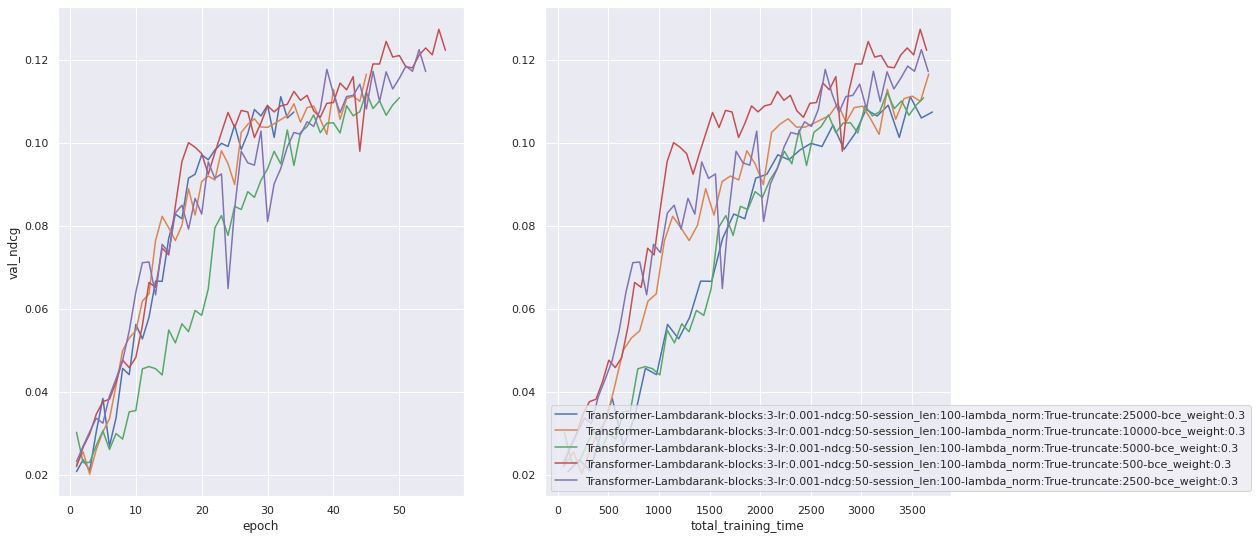

In [59]:
moving_average_steps=1
max_points = 30000


def get_metric(metric_history, metric_name):
    result = []
    for item in metric_history:
        try:
            result.append(item[metric_name])
        except:
            print(item)
    return result

plt.figure(figsize=(16, 9))

axises = ['epoch', 'total_training_time']

fig, ax = plt.subplots(1, len(axises))
fig.set_figheight(9)
fig.set_figwidth(16)

interesting_models = ['Transformer-Lambdarank-blocks:3-lr:0.001-ndcg:50-session_len:100-lambda_norm:True-truncate:25000-bce_weight:0.3', 
                      'Transformer-Lambdarank-blocks:3-lr:0.001-ndcg:50-session_len:100-lambda_norm:True-truncate:10000-bce_weight:0.3', 
                      'Transformer-Lambdarank-blocks:3-lr:0.001-ndcg:50-session_len:100-lambda_norm:True-truncate:5000-bce_weight:0.3', 
                      'Transformer-Lambdarank-blocks:3-lr:0.001-ndcg:50-session_len:100-lambda_norm:True-truncate:2500-bce_weight:0.3',
                      'Transformer-Lambdarank-blocks:3-lr:0.001-ndcg:50-session_len:100-lambda_norm:True-truncate:500-bce_weight:0.3'
                     ]
second_metrics = {}

for recommender in data:
    if recommender['model_name'] not in interesting_models:
        continue
    if len(recommender['metrics_history']) > 0:
        history = recommender['metrics_history']
        metric_name = 'val_ndcg'
        second_metric_name = None
        metric = moving_average(get_metric(history, metric_name), moving_average_steps)[:max_points]
        if second_metric_name != None:
            second_metric = moving_average(get_metric(history, second_metric_name), moving_average_steps)[:max_points]
        #success = get_metric(history, 'Success_at_4')
        #val_success = moving_average(get_metric(history, 'val_Success_at_4'), 5)
        
        #plt.plot(val_success, label=recommender['model_name'] + "val_sps")
        #plt.plot(success, label=recommender['model_name'] + "sps")
        for axis_num in range(len(axises)):
            axis_name = axises[axis_num]
            axis = get_metric(history, axis_name)[moving_average_steps - 1:][:max_points]
            ax[axis_num].plot(axis, metric,label=recommender['model_name'])
            
            ax[axis_num].set_xlabel(axis_name)
            if axis_num == 0:
                ax[axis_num].set_ylabel(metric_name)
            
            if (second_metric_name != None):
                if axis_num not in second_metrics:
                    second_metrics[axis_num] = ax[axis_num].twinx()
                    print(axis_num, second_metrics.keys())
                ax2 = second_metrics[axis_num]
                if axis_num == 1:
                    ax2.set_ylabel(second_metric_name)
                ax2.plot(axis, second_metric, '--', label=recommender['model_name'],)

            
        #plt.plot(ndcg, label=recommender['model_name'] + "ndcg")
        #plt.plot(val_success, label=recommender['model_name'] + "_val_sps")
plt.legend()


In [58]:
len(metric), len(metric) - np.argmax(metric) - 1

(45, 0)

In [144]:
max(metric)

0.04040786251425743